In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from pandas import json_normalize
import datetime
import time

%matplotlib inline


In [2]:
#Import flat file to a dataframe to begin cleanup
df1 = pd.read_csv("Crime_Data.csv")
df1.head()

/home/kim/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Case and Offense,Case Number,Reported Date,Nature Of Call,From Date,Offense,Description,Block Address,City,State,Beat,Division,Council District,Attempt Complete,Location Type,Location Description,Location
0,200051119-90Z,200051119,07/04/2020,PENAL CODE,07/04/2020 10:00:00 AM,90Z,PC 21.07 Public Lewdness 90Z ALL OTHER OFFENSE...,1400 GREEN OAKS RD,FORT WORTH,TX,L11,West,3.0,C,24.0,24 SPECIALTY STORE,NaN
1,200085517-90Z,200085517,11/03/2020,HARASS,08/12/2020 05:18:00 AM,90Z,PC 42.07(C) Harassment,1300 MARLBOROUGH DR,FORT WORTH,TX,I16,South,8.0,C,20.0,20 RESIDENCE/HOME,"(32.640426597727426, -97.33851074771222)"
2,190083263-WAR,190083263,09/24/2019,NARCOTIC VIOLATIONS,09/24/2019 10:30:00 PM,WAR,OT WARRANT Out of Town Warrant WAR Warrants on...,SOUTH FWY,FORT WORTH,TX,I11,South,9.0,C,13.0,13 HIGHWAY/ROAD/ALLEY,NaN
3,190088406-13B,190088406,10/10/2019,SEXUAL ASSAULT,10/10/2019 09:56:32 PM,13B,PC 22.01(A)(1)FV Aslt Causes B/I Family Member...,TANDY AVE / VIEW ST,FORT WORTH,TX,G11,NaN,NaN,C,8.0,08 DEPARTMENT/DISCOUNT STORE,NaN
4,190047946-35A,190047946,06/04/2019,NARCOTIC VIOLATIONS,06/04/2019 01:33:49 AM,35A,HSC 481.117(B) Poss CS PG 3 <28G 35A DRUG/NARC...,OAK GROVE RD / E IH 20 FWY EB,NaN,TX,I17,NaN,NaN,C,13.0,13 HIGHWAY/ROAD/ALLEY,NaN


In [3]:
#Creating list of columns to use in for loops

columns = df1.columns
columns = columns.tolist()
columns

['Case and Offense',
 'Case Number',
 'Reported Date',
 'Nature Of Call',
 'From Date',
 'Offense',
 'Description',
 'Block Address',
 'City',
 'State',
 'Beat',
 'Division',
 'Council District',
 'Attempt Complete',
 'Location Type',
 'Location Description',
 'Location']

In [4]:
#Checking for duplicates in all columns. True = duplicated values, False = no duplicates

for item in columns:
    print(item, "duplication - {}".format(any(df1.duplicated(subset = [item]))))

Case and Offense duplication - False
Case Number duplication - True
Reported Date duplication - True
Nature Of Call duplication - True
From Date duplication - True
Offense duplication - True
Description duplication - True
Block Address duplication - True
City duplication - True
State duplication - True
Beat duplication - True
Division duplication - True
Council District duplication - True
Attempt Complete duplication - True
Location Type duplication - True
Location Description duplication - True
Location duplication - True


In [5]:
#Checking for missing values. True = missing values, False = no missing values

for item in columns:
    print ("Are there Nan's in ",item,"? %s " % df1[item].isnull().values.any())

Are there Nan's in  Case and Offense ? False 
Are there Nan's in  Case Number ? False 
Are there Nan's in  Reported Date ? True 
Are there Nan's in  Nature Of Call ? False 
Are there Nan's in  From Date ? True 
Are there Nan's in  Offense ? False 
Are there Nan's in  Description ? False 
Are there Nan's in  Block Address ? False 
Are there Nan's in  City ? True 
Are there Nan's in  State ? True 
Are there Nan's in  Beat ? True 
Are there Nan's in  Division ? True 
Are there Nan's in  Council District ? True 
Are there Nan's in  Attempt Complete ? True 
Are there Nan's in  Location Type ? True 
Are there Nan's in  Location Description ? True 
Are there Nan's in  Location ? True 


In [6]:
#Checking number of NaN's per column
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(df1[item].isnull().sum()))

Number of NaN's for  Case and Offense - 0
Number of NaN's for  Case Number - 0
Number of NaN's for  Reported Date - 2
Number of NaN's for  Nature Of Call - 0
Number of NaN's for  From Date - 1
Number of NaN's for  Offense - 0
Number of NaN's for  Description - 0
Number of NaN's for  Block Address - 0
Number of NaN's for  City - 112
Number of NaN's for  State - 34
Number of NaN's for  Beat - 460
Number of NaN's for  Division - 36186
Number of NaN's for  Council District - 34474
Number of NaN's for  Attempt Complete - 4
Number of NaN's for  Location Type - 12
Number of NaN's for  Location Description - 12
Number of NaN's for  Location - 1610


In [7]:
#Fill NaN's in City with Fort Worth, since this data is provided by the City of Fort Worth
df1['City'].fillna('FORT WORTH', inplace = True)

df1['City'].isnull().values.any()

False

In [8]:
#Checking original length of column
print (len(df1['Reported Date']))

125199


In [9]:
#Dropping NaN values from the Reported Date column
df1 = df1[df1['Reported Date'].notnull()]

#Checking for any remaining missing values and new length of column
print (df1['Reported Date'].isnull().sum())
print (len(df1['Reported Date']))

0
125197


In [10]:
#Checking original length of column
print (len(df1['Location Type']))

125197


In [11]:
#Dropping NaN values from the Location Type column
df1 = df1[df1['Location Type'].notnull()]

#Checking for any remaining missing values and new length of column
print (df1['Location Type'].isnull().sum())
print (len(df1['Location Type']))

0
125186


In [12]:
#Checking original length of column
print (len(df1['Location Description']))

125186


In [13]:
#Dropping NaN values from the Location Description column
df1 = df1[df1['Location Description'].notnull()]

#Checking for any remaining missing values and new length of column
print (df1['Location Description'].isnull().sum())
print (len(df1['Location Description']))

0
125186


In [14]:
#Checking number of NaN's per column
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(df1[item].isnull().sum()))

Number of NaN's for  Case and Offense - 0
Number of NaN's for  Case Number - 0
Number of NaN's for  Reported Date - 0
Number of NaN's for  Nature Of Call - 0
Number of NaN's for  From Date - 0
Number of NaN's for  Offense - 0
Number of NaN's for  Description - 0
Number of NaN's for  Block Address - 0
Number of NaN's for  City - 0
Number of NaN's for  State - 34
Number of NaN's for  Beat - 460
Number of NaN's for  Division - 36179
Number of NaN's for  Council District - 34469
Number of NaN's for  Attempt Complete - 2
Number of NaN's for  Location Type - 0
Number of NaN's for  Location Description - 0
Number of NaN's for  Location - 1609


In [15]:
#Finding unique values in the City Column, making sure all are relavent City names
df1.City.unique()

array(['FORT WORTH', 'ALEDO', 'SOUTHLAKE', 'WATAUGA', 'ARLINGTON',
       'LAKE WORTH', 'Fort Worth', 'NORTH RICH', 'whittier', 'MINOT',
       'JUSTIN', 'FOREST HIL', 'GRAND PRAI', 'BURLESON', 'EULESS',
       'SAGINAW', 'HOUSTON', 'WHITE SETT', 'HALTOM CIT', 'RICHLAND H',
       'TARRANT CO', 'BENBROOK', 'DFW AIRPOR', 'EVERMAN', 'IRVING',
       'CROWLEY', 'KELLER', 'SANSOM PAR', 'DALLAS', 'HURST', 'ft worth',
       'HASLET', 'DENTON', 'GW', 'fort worth', 'EDGECLIFF', 'NAS/JRB Fo',
       'KENNEDALE', 'WESTWORTH', 'Texas', 'LAKESIDE', 'Denton Cou',
       'Keller', 'ft. worth', 'ft', 'FT', 'SHREVEPORT', 'RIVER OAKS',
       'FORT WORRT', 'FT WORTH', 'Northlake', 'Baytown', 'DFW Airpor',
       'Naval Air', 'Westover H', 'EL PASEO', 'dfw airpor'], dtype=object)

In [16]:
#Update format to all upper case to eliminate values that were spelled the same with differenct cases
df1['City'] = df1['City'].str.upper()
print(sorted(df1['City'].unique()))

['ALEDO', 'ARLINGTON', 'BAYTOWN', 'BENBROOK', 'BURLESON', 'CROWLEY', 'DALLAS', 'DENTON', 'DENTON COU', 'DFW AIRPOR', 'EDGECLIFF', 'EL PASEO', 'EULESS', 'EVERMAN', 'FOREST HIL', 'FORT WORRT', 'FORT WORTH', 'FT', 'FT WORTH', 'FT. WORTH', 'GRAND PRAI', 'GW', 'HALTOM CIT', 'HASLET', 'HOUSTON', 'HURST', 'IRVING', 'JUSTIN', 'KELLER', 'KENNEDALE', 'LAKE WORTH', 'LAKESIDE', 'MINOT', 'NAS/JRB FO', 'NAVAL AIR', 'NORTH RICH', 'NORTHLAKE', 'RICHLAND H', 'RIVER OAKS', 'SAGINAW', 'SANSOM PAR', 'SHREVEPORT', 'SOUTHLAKE', 'TARRANT CO', 'TEXAS', 'WATAUGA', 'WESTOVER H', 'WESTWORTH', 'WHITE SETT', 'WHITTIER']


In [17]:
#Correct individual misspellings and abbreviations
df1.City = df1.City.replace(['FORT WORRT', 'FT', 'FT WORTH', 'FT. WORTH', 'GW', 'NAS/JRB FO', 'NAVAL AIR', 'TEXAS', 'TARRANT CO'], 'FORT WORTH')
df1['City'] = df1['City'].replace(['DENTON COU'], 'DENTON')
df1['City'] = df1['City'].replace(['DFW AIRPOR'], 'DFW AIRPORT')
df1['City'] = df1['City'].replace(['FOREST HIL'], 'FOREST HILL')
df1['City'] = df1['City'].replace(['GRAND PRAI'], 'GRAND PRAIRIE')
df1['City'] = df1['City'].replace(['HALTOM CIT'], 'HALTOM CITY')
df1['City'] = df1['City'].replace(['NORTH RICH'], 'NORTH RICHLAND HILLS')
df1['City'] = df1['City'].replace(['RICHLAND H'], 'RICHLAND HILLS')
df1['City'] = df1['City'].replace(['SANSOM PAR'], 'SANSOM PARK')
df1['City'] = df1['City'].replace(['WESTOVER H'], 'WESTOVER HILLS')
df1['City'] = df1['City'].replace(['WHITE SETT'], 'WHITE SETTLEMENT')

In [18]:
print(sorted(df1['City'].unique()))

['ALEDO', 'ARLINGTON', 'BAYTOWN', 'BENBROOK', 'BURLESON', 'CROWLEY', 'DALLAS', 'DENTON', 'DFW AIRPORT', 'EDGECLIFF', 'EL PASEO', 'EULESS', 'EVERMAN', 'FOREST HILL', 'FORT WORTH', 'GRAND PRAIRIE', 'HALTOM CITY', 'HASLET', 'HOUSTON', 'HURST', 'IRVING', 'JUSTIN', 'KELLER', 'KENNEDALE', 'LAKE WORTH', 'LAKESIDE', 'MINOT', 'NORTH RICHLAND HILLS', 'NORTHLAKE', 'RICHLAND HILLS', 'RIVER OAKS', 'SAGINAW', 'SANSOM PARK', 'SHREVEPORT', 'SOUTHLAKE', 'WATAUGA', 'WESTOVER HILLS', 'WESTWORTH', 'WHITE SETTLEMENT', 'WHITTIER']


In [19]:
# Removing Houston, Whittier, Shreveport, and Minot, as they are not in the DFW metroplex and therefore out of scope
df1 = df1.drop(df1[df1['City'] == 'HOUSTON'].index)
df1 = df1.drop(df1[df1['City'] == 'WHITTIER'].index)
df1 = df1.drop(df1[df1['City'] == 'SHREVEPORT'].index)
df1 = df1.drop(df1[df1['City'] == 'MINOT'].index)

In [20]:
print(sorted(df1['City'].unique()))

['ALEDO', 'ARLINGTON', 'BAYTOWN', 'BENBROOK', 'BURLESON', 'CROWLEY', 'DALLAS', 'DENTON', 'DFW AIRPORT', 'EDGECLIFF', 'EL PASEO', 'EULESS', 'EVERMAN', 'FOREST HILL', 'FORT WORTH', 'GRAND PRAIRIE', 'HALTOM CITY', 'HASLET', 'HURST', 'IRVING', 'JUSTIN', 'KELLER', 'KENNEDALE', 'LAKE WORTH', 'LAKESIDE', 'NORTH RICHLAND HILLS', 'NORTHLAKE', 'RICHLAND HILLS', 'RIVER OAKS', 'SAGINAW', 'SANSOM PARK', 'SOUTHLAKE', 'WATAUGA', 'WESTOVER HILLS', 'WESTWORTH', 'WHITE SETTLEMENT']


In [21]:
#Checking unique values in the state column
df1['State'] = df1['State'].astype('str',copy=False)
print(sorted(df1['State'].unique()))

['TX', 'Te', 'nan']


In [22]:
#Checking nan values in State column
df1_filtered = df1[df1['State'] == 'nan']
df1_filtered

,Case and Offense,Case Number,Reported Date,Nature Of Call,From Date,Offense,Description,Block Address,City,State,Beat,Division,Council District,Attempt Complete,Location Type,Location Description,Location
637,190076680-35A,190076680,09/04/2019,NARCOTIC VIOLATIONS,09/04/2019 03:48:37 PM,35A,HSC 481.121(B)(1) Poss Marij <=2OZ 35A DRUG/NA...,100 TRINITY TRAILS MILE MARKER CF,FORT WORTH,nan,K11,NaN,NaN,C,25.0,25 OTHER/UNKNOWN,NaN
652,190076680-35B,190076680,09/04/2019,NARCOTIC VIOLATIONS,09/04/2019 03:48:37 PM,35B,GC 084 Possession of Drug Paraphenalia 35B DRU...,100 TRINITY TRAILS MILE MARKER CF,FORT WORTH,nan,K11,NaN,NaN,C,25.0,25 OTHER/UNKNOWN,NaN
3191,180105589-90Z,180105589,11/28/2018,CRIMINAL MISCHIEF,11/27/2018 05:00:00 PM,90Z,GC 039 Criminal Mischief under $100/Subst Inco...,3600 EAST LOOP 820 NORTH BOUND,FORT WORTH,nan,G14,NaN,NaN,C,25.0,25 OTHER/UNKNOWN,NaN
3332,190058786-200,190058786,07/09/2019,ARSON,07/08/2019 07:00:00 PM,200,PC 28.02(A) Arson Building/Veh only 200 ARSON ...,2100 MINNIS DR,HALTOM CITY,nan,NaN,NaN,NaN,C,6.0,06 CONSTRUCTION SITE,NaN
3366,190112082-35B,190112082,12/30/2019,NARCOTIC VIOLATIONS,12/30/2019 02:15:25 PM,35B,GC 084 Possession of Drug Paraphenalia 35B DRU...,3900 CREECH,FORT WORTH,nan,NaN,NaN,NaN,C,13.0,13 HIGHWAY/ROAD/ALLEY,NaN
3379,190112082-35A,190112082,12/30/2019,NARCOTIC VIOLATIONS,12/30/2019 02:15:25 PM,35A,HSC 481.121(B)(1) Poss Marij <=2OZ 35A DRUG/NA...,3900 CREECH,FORT WORTH,nan,NaN,NaN,NaN,C,13.0,13 HIGHWAY/ROAD/ALLEY,NaN
3402,200002581-90D,200002581,01/10/2020,DWI,01/10/2020 02:28:00 AM,90D,PC 49.04 Driving While Intoxicated 90D DRIVING...,15200 NORTH FREEWAY NB SR,FORT WORTH,nan,NaN,NaN,NaN,C,13.0,13 HIGHWAY/ROAD/ALLEY,NaN
3489,200014706-35A,200014706,02/20/2020,NARCOTIC VIOLATIONS,02/20/2020 05:30:00 PM,35A,HSC 481.121(B)(1) Poss Marij <=2OZ 35A DRUG/NA...,600,FORT WORTH,nan,NaN,NaN,NaN,C,13.0,13 HIGHWAY/ROAD/ALLEY,NaN
9815,180096214-90E,180096214,10/28/2018,PUBLIC INTOXICATION,10/28/2018 05:17:00 AM,90E,GC 080 Public Intoxication 90E DRUNKENNESS 000...,2600 N. MAIN ST,FORT WORTH,nan,NaN,NaN,NaN,C,18.0,18 PARKING LOT/GARAGE,"(32.79213951545318, -97.34920985943383)"
9816,180096214-90Z,180096214,10/28/2018,PUBLIC INTOXICATION,10/28/2018 05:17:00 AM,90Z,PC 38.03(A) Resisting Arr/Search/Transport 90Z...,2600 N. MAIN ST,FORT WORTH,nan,NaN,NaN,NaN,C,18.0,18 PARKING LOT/GARAGE,"(32.79213951545318, -97.34920985943383)"


In [23]:
#Updating misspelling and missing value and rechecking unique values
df1['State'] = df1['State'].replace(['Te', 'nan'], 'TX')
print(sorted(df1['State'].unique()))

['TX']


In [24]:
#Checking for outliers in Reported Date column
dates = df1['Reported Date'].unique()
dates.sort()
dates

array(['01/01/2019', '01/01/2020', '01/01/2021', '01/02/2019',
       '01/02/2020', '01/02/2021', '01/03/2019', '01/03/2020',
       '01/03/2021', '01/04/2019', '01/04/2020', '01/04/2021',
       '01/05/2019', '01/05/2020', '01/05/2021', '01/06/2019',
       '01/06/2020', '01/06/2021', '01/07/2019', '01/07/2020',
       '01/07/2021', '01/08/2018', '01/08/2019', '01/08/2020',
       '01/08/2021', '01/09/2019', '01/09/2020', '01/09/2021',
       '01/10/2019', '01/10/2020', '01/10/2021', '01/11/2019',
       '01/11/2020', '01/11/2021', '01/12/2019', '01/12/2020',
       '01/12/2021', '01/13/2019', '01/13/2020', '01/13/2021',
       '01/14/2002', '01/14/2019', '01/14/2020', '01/14/2021',
       '01/15/2019', '01/15/2020', '01/15/2021', '01/16/2019',
       '01/16/2020', '01/16/2021', '01/17/2019', '01/17/2020',
       '01/17/2021', '01/18/2019', '01/18/2020', '01/18/2021',
       '01/19/2019', '01/19/2020', '01/19/2021', '01/20/2019',
       '01/20/2020', '01/20/2021', '01/21/2019', '01/21

In [25]:
#Importing website table to a list then dataframe to begin cleanup
lst = pd.read_html('Health Data | City of Fort Worth, Texas.html')
df2 = lst[0]
df2.head()

,InspectionItemID,Site_Number,Site_Name,Address,Suite,City,State,Zip,Inventory_Number,Description,...,Long_Violation,To_Wit,Points,Program_Type,Program_Type_Description,Corrected_OnSite,Location_1,GeoCodeScore,X,Y
0,12212015-7288-51014495-28I,7288,USA FOOD MART & GRILL #1,3501 MILLER AVE,NaN,FORT WORTH,TX,76119,1,Shared,...,Garbage and Refuse Disposal - Location and con...,Side door of dumpster is open,0,16F,Eating Establishment,NaN,"(32.710818349780446°, -97.2628379166363°)",100,2.349001e+06,6.943782e+06
1,01072015-6832-62014929-28F,6832,IHOP #1465,5901 SW LOOP 820,NaN,FORT WORTH,TX,76132,1,Regular,...,Wiping Cloths/Linens/Napkins/Sponges - Use and...,TFER 229.164(h)(3)(B) - Page 36. Wiping cloths...,0,16F,Eating Establishment,Y,"(32.68262053270859°, -97.41342127325133°)",87,2.302796e+06,6.933012e+06
2,01292019-12459-41011077-47,12459,MASHD,2948 CROCKETT ST,NaN,FORT WORTH,TX,76107,1,Regular,...,"TFER 228.71(b)(1), (b)(2), &(b)(4), 33(b), 175...",Inspection report sign not posted for public v...,1,16F,Eating Establishment,NaN,"(32.75022134937938°, -97.35927566534761°)",100,2.319187e+06,6.957780e+06
3,04062015-3697-61018764-28G,3697,BRAUMS ICE CREAM #216,7212 S HULEN ST,NaN,FORT WORTH,TX,76133,1,Regular,...,Single-service/Single-use Articles - Use and s...,Two sleeves of take out bowls are on the floor...,0,16F,Eating Establishment,Y,"(32.64252609739313°, -97.39590880791458°)",100,2.308337e+06,6.918482e+06
4,06062018-9589-40005352-36,9589,TAVERNA FORT WORTH,450 THROCKMORTON ST,NaN,FORT WORTH,TX,76102,1,Regular,...,"228.68(d)(1)(A), 228.68(d)(1)(B), 228.68(d)(2)...",Cloths in-use for wiping are not stored in san...,1,16F,Eating Establishment,NaN,"(32.754037842985745°, -97.33304161863208°)",100,2.327236e+06,6.959257e+06


In [26]:
#Creating list of columns to use in for loops

columns = df2.columns
columns = columns.tolist()
columns

['InspectionItemID',
 'Site_Number',
 'Site_Name',
 'Address',
 'Suite',
 'City',
 'State',
 'Zip',
 'Inventory_Number',
 'Description',
 'InspectionDate',
 'Inventory_Loc',
 'Score',
 'Control_Number',
 'Violation_Code',
 'Number_Of_Violations',
 'Critical',
 'Repeat',
 'Date_Corrected',
 'Short_Violation',
 'Long_Violation',
 'To_Wit',
 'Points',
 'Program_Type',
 'Program_Type_Description',
 'Corrected_OnSite',
 'Location_1',
 'GeoCodeScore',
 'X',
 'Y']

In [27]:
#Checking for duplicates in all columns. True = duplicated values, False = no duplicates

for item in columns:
    print(item, "duplication - {}".format(any(df2.duplicated(subset = [item]))))

InspectionItemID duplication - False
Site_Number duplication - True
Site_Name duplication - True
Address duplication - True
Suite duplication - True
City duplication - True
State duplication - True
Zip duplication - True
Inventory_Number duplication - True
Description duplication - True
InspectionDate duplication - True
Inventory_Loc duplication - True
Score duplication - True
Control_Number duplication - True
Violation_Code duplication - True
Number_Of_Violations duplication - True
Critical duplication - True
Repeat duplication - True
Date_Corrected duplication - True
Short_Violation duplication - True
Long_Violation duplication - True
To_Wit duplication - True
Points duplication - True
Program_Type duplication - True
Program_Type_Description duplication - True
Corrected_OnSite duplication - True
Location_1 duplication - True
GeoCodeScore duplication - True
X duplication - True
Y duplication - True


In [28]:
#Checking for missing values. True = missing values, False = no missing values

for item in columns:
    print ("Are there Nan's in ",item,"? %s " % df2[item].isnull().values.any())

Are there Nan's in  InspectionItemID ? False 
Are there Nan's in  Site_Number ? False 
Are there Nan's in  Site_Name ? False 
Are there Nan's in  Address ? False 
Are there Nan's in  Suite ? True 
Are there Nan's in  City ? False 
Are there Nan's in  State ? False 
Are there Nan's in  Zip ? False 
Are there Nan's in  Inventory_Number ? False 
Are there Nan's in  Description ? False 
Are there Nan's in  InspectionDate ? False 
Are there Nan's in  Inventory_Loc ? False 
Are there Nan's in  Score ? False 
Are there Nan's in  Control_Number ? False 
Are there Nan's in  Violation_Code ? False 
Are there Nan's in  Number_Of_Violations ? True 
Are there Nan's in  Critical ? False 
Are there Nan's in  Repeat ? True 
Are there Nan's in  Date_Corrected ? True 
Are there Nan's in  Short_Violation ? False 
Are there Nan's in  Long_Violation ? True 
Are there Nan's in  To_Wit ? True 
Are there Nan's in  Points ? False 
Are there Nan's in  Program_Type ? False 
Are there Nan's in  Program_Type_Descr

In [29]:
#Checking number of NaN's per column
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(df2[item].isnull().sum()))

Number of NaN's for  InspectionItemID - 0
Number of NaN's for  Site_Number - 0
Number of NaN's for  Site_Name - 0
Number of NaN's for  Address - 0
Number of NaN's for  Suite - 90
Number of NaN's for  City - 0
Number of NaN's for  State - 0
Number of NaN's for  Zip - 0
Number of NaN's for  Inventory_Number - 0
Number of NaN's for  Description - 0
Number of NaN's for  InspectionDate - 0
Number of NaN's for  Inventory_Loc - 0
Number of NaN's for  Score - 0
Number of NaN's for  Control_Number - 0
Number of NaN's for  Violation_Code - 0
Number of NaN's for  Number_Of_Violations - 7
Number of NaN's for  Critical - 0
Number of NaN's for  Repeat - 3
Number of NaN's for  Date_Corrected - 85
Number of NaN's for  Short_Violation - 0
Number of NaN's for  Long_Violation - 10
Number of NaN's for  To_Wit - 5
Number of NaN's for  Points - 0
Number of NaN's for  Program_Type - 0
Number of NaN's for  Program_Type_Description - 0
Number of NaN's for  Corrected_OnSite - 86
Number of NaN's for  Location_1 

In [30]:
#Filtering out the row with Nan value in the ITEM column, since there is only one
df2[df2.Number_Of_Violations.isnull()].Short_Violation

27                                             COMMENT:
38    Congratulations - No Health Violations Identified
58    Congratulations - No Health Violations Identified
62                                             COMMENT:
82    Congratulations - No Health Violations Identified
84                                             COMMENT:
93    Congratulations - No Health Violations Identified
Name: Short_Violation, dtype: object

In [31]:
#Fill NaN's in Number_Of_Violations with 0 
df2['Number_Of_Violations'].fillna('0', inplace = True)

df2['Number_Of_Violations'].isnull().values.any()

False

In [32]:
#Checking remaining number of NaN's per column
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(df2[item].isnull().sum()))

Number of NaN's for  InspectionItemID - 0
Number of NaN's for  Site_Number - 0
Number of NaN's for  Site_Name - 0
Number of NaN's for  Address - 0
Number of NaN's for  Suite - 90
Number of NaN's for  City - 0
Number of NaN's for  State - 0
Number of NaN's for  Zip - 0
Number of NaN's for  Inventory_Number - 0
Number of NaN's for  Description - 0
Number of NaN's for  InspectionDate - 0
Number of NaN's for  Inventory_Loc - 0
Number of NaN's for  Score - 0
Number of NaN's for  Control_Number - 0
Number of NaN's for  Violation_Code - 0
Number of NaN's for  Number_Of_Violations - 0
Number of NaN's for  Critical - 0
Number of NaN's for  Repeat - 3
Number of NaN's for  Date_Corrected - 85
Number of NaN's for  Short_Violation - 0
Number of NaN's for  Long_Violation - 10
Number of NaN's for  To_Wit - 5
Number of NaN's for  Points - 0
Number of NaN's for  Program_Type - 0
Number of NaN's for  Program_Type_Description - 0
Number of NaN's for  Corrected_OnSite - 86
Number of NaN's for  Location_1 

In [33]:
#Finding unique values in the City Column, making sure all are relavent City names
df2.City.unique()

array(['FORT WORTH'], dtype=object)

In [34]:
#Finding unique values in the State Column, making sure all are TX
df2.State.unique()

array(['TX'], dtype=object)

In [35]:
#Begin process of importing API info into Dataframe to clean up

#Assign set API key
apikey = '64a44e082f2158910c464ad99b2d090a'
#latitude of Fort Worth
lat = '32.768799'
#longitude of Fort Worth
lon = '-97.309341'
#pull unix timestamp for prior four days
yesterday = datetime.date.today() - datetime.timedelta(1)
time1 = yesterday.strftime("%s")

twodays = datetime.date.today() - datetime.timedelta(2)
time2 = twodays.strftime("%s")

threedays = datetime.date.today() - datetime.timedelta(3)
time3 = threedays.strftime("%s")

fourdays = datetime.date.today() - datetime.timedelta(4)
time4 = fourdays.strftime("%s")


In [36]:
#Creating unique URL using longitude & latitude of Fort Worth and using Imperial units
URL1 = 'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat='+lat+'&lon='+lon+'&dt='+time1+'&appid='+apikey+'&units=imperial'
URL2 = 'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat='+lat+'&lon='+lon+'&dt='+time2+'&appid='+apikey+'&units=imperial'
URL3 = 'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat='+lat+'&lon='+lon+'&dt='+time3+'&appid='+apikey+'&units=imperial'
URL4 = 'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat='+lat+'&lon='+lon+'&dt='+time4+'&appid='+apikey+'&units=imperial'

In [37]:
#Pulling the requests using the unique URLs created for each timestamp
response1 = requests.get(URL1)
response2 = requests.get(URL2)
response3 = requests.get(URL3)
response4 = requests.get(URL4)

In [38]:
#Pulling JSON data
dictr1 = response1.json()
dictr2 = response2.json()
dictr3 = response3.json()
dictr4 = response4.json()

In [39]:
#Converting JSON data into dataframes
APIdf1 = pd.json_normalize(dictr1)
APIdf2 = pd.json_normalize(dictr2)
APIdf3 = pd.json_normalize(dictr3)
APIdf4 = pd.json_normalize(dictr4)

In [40]:
#Concatenating all dataframes into one
df3 = pd.concat([APIdf1, APIdf2, APIdf3, APIdf4], keys=['1', '2', '3', '4'])

In [41]:
columns = df3.columns
columns = columns.tolist()

In [42]:
#Checking number of NaN's per column
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(df3[item].isnull().sum()))

Number of NaN's for  lat - 0
Number of NaN's for  lon - 0
Number of NaN's for  timezone - 0
Number of NaN's for  timezone_offset - 0
Number of NaN's for  hourly - 0
Number of NaN's for  current.dt - 0
Number of NaN's for  current.sunrise - 0
Number of NaN's for  current.sunset - 0
Number of NaN's for  current.temp - 0
Number of NaN's for  current.feels_like - 0
Number of NaN's for  current.pressure - 0
Number of NaN's for  current.humidity - 0
Number of NaN's for  current.dew_point - 0
Number of NaN's for  current.uvi - 0
Number of NaN's for  current.clouds - 0
Number of NaN's for  current.wind_speed - 0
Number of NaN's for  current.wind_deg - 0
Number of NaN's for  current.weather - 0
Number of NaN's for  current.visibility - 1


In [43]:
# Since we know the latitude and longitude are specific to Fort Worth, we can create a column for City 
df3['City'] = ['Fort Worth', 'Fort Worth', 'Fort Worth', 'Fort Worth']

In [44]:
df3.head()

,,lat,lon,timezone,timezone_offset,hourly,current.dt,current.sunrise,current.sunset,current.temp,current.feels_like,current.pressure,current.humidity,current.dew_point,current.uvi,current.clouds,current.wind_speed,current.wind_deg,current.weather,current.visibility,City
1,0,32.7688,-97.3093,America/Chicago,-21600,"[{'dt': 1614902400, 'temp': 68.52, 'feels_like...",1614924000,1614948720,1614990576,59.36,48.31,1014,57,44.15,5.13,0,17.20,167,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,Fort Worth
2,0,32.7688,-97.3093,America/Chicago,-21600,"[{'dt': 1614816000, 'temp': 66.09, 'feels_like...",1614837600,1614862394,1614904130,52.90,46.51,1021,50,34.79,5.84,1,5.75,120,"[{'id': 800, 'main': 'Clear', 'description': '...",16093.0,Fort Worth
3,0,32.7688,-97.3093,America/Chicago,-21600,"[{'dt': 1614729600, 'temp': 60.21, 'feels_like...",1614751200,1614776068,1614817683,46.69,40.57,1020,57,32.29,5.66,1,4.61,180,"[{'id': 800, 'main': 'Clear', 'description': '...",16093.0,Fort Worth
4,0,32.7688,-97.3093,America/Chicago,-21600,"[{'dt': 1614643200, 'temp': 56.19, 'feels_like...",1614664800,1614689741,1614731236,46.33,42.87,1026,76,39.18,5.56,90,1.90,90,"[{'id': 804, 'main': 'Clouds', 'description': ...",16093.0,Fort Worth


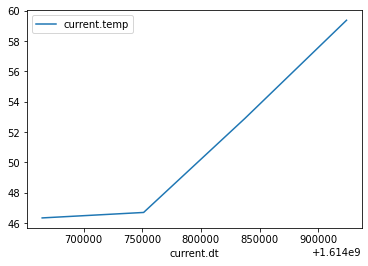

In [45]:
#check for outliers in temperature 
df3.plot(x = 'current.dt', y = 'current.temp')

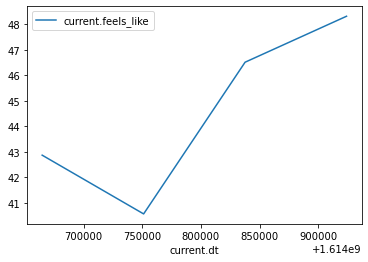

In [46]:
#check for outliers in feels like
df3.plot(x = 'current.dt', y = 'current.feels_like')

In [47]:
#Converting the current.dt timestamp to CST timestamp from Unix
df3['current.dt'] = pd.to_datetime(df3['current.dt'], unit='s')
df3['current.dt'] = df3['current.dt'].dt.tz_localize('UTC').dt.tz_convert('US/Central')
print(df3['current.dt'])

1  0   2021-03-05 00:00:00-06:00
2  0   2021-03-04 00:00:00-06:00
3  0   2021-03-03 00:00:00-06:00
4  0   2021-03-02 00:00:00-06:00
Name: current.dt, dtype: datetime64[ns, US/Central]


In [48]:
#Converting the current.sunrise timestamp to CST timestamp from Unix
df3['current.sunrise'] = pd.to_datetime(df3['current.sunrise'], unit='s')
df3['current.sunrise'] = df3['current.sunrise'].dt.tz_localize('UTC').dt.tz_convert('US/Central')
print(df3['current.sunrise'])

1  0   2021-03-05 06:52:00-06:00
2  0   2021-03-04 06:53:14-06:00
3  0   2021-03-03 06:54:28-06:00
4  0   2021-03-02 06:55:41-06:00
Name: current.sunrise, dtype: datetime64[ns, US/Central]


In [49]:
df3.head()

,,lat,lon,timezone,timezone_offset,hourly,current.dt,current.sunrise,current.sunset,current.temp,current.feels_like,current.pressure,current.humidity,current.dew_point,current.uvi,current.clouds,current.wind_speed,current.wind_deg,current.weather,current.visibility,City
1,0,32.7688,-97.3093,America/Chicago,-21600,"[{'dt': 1614902400, 'temp': 68.52, 'feels_like...",2021-03-05 00:00:00-06:00,2021-03-05 06:52:00-06:00,1614990576,59.36,48.31,1014,57,44.15,5.13,0,17.20,167,"[{'id': 800, 'main': 'Clear', 'description': '...",NaN,Fort Worth
2,0,32.7688,-97.3093,America/Chicago,-21600,"[{'dt': 1614816000, 'temp': 66.09, 'feels_like...",2021-03-04 00:00:00-06:00,2021-03-04 06:53:14-06:00,1614904130,52.90,46.51,1021,50,34.79,5.84,1,5.75,120,"[{'id': 800, 'main': 'Clear', 'description': '...",16093.0,Fort Worth
3,0,32.7688,-97.3093,America/Chicago,-21600,"[{'dt': 1614729600, 'temp': 60.21, 'feels_like...",2021-03-03 00:00:00-06:00,2021-03-03 06:54:28-06:00,1614817683,46.69,40.57,1020,57,32.29,5.66,1,4.61,180,"[{'id': 800, 'main': 'Clear', 'description': '...",16093.0,Fort Worth
4,0,32.7688,-97.3093,America/Chicago,-21600,"[{'dt': 1614643200, 'temp': 56.19, 'feels_like...",2021-03-02 00:00:00-06:00,2021-03-02 06:55:41-06:00,1614731236,46.33,42.87,1026,76,39.18,5.56,90,1.90,90,"[{'id': 804, 'main': 'Clouds', 'description': ...",16093.0,Fort Worth


In [50]:
df3 = df3.drop(columns=['hourly', 'current.weather'])

In [51]:
df3.head()

,,lat,lon,timezone,timezone_offset,current.dt,current.sunrise,current.sunset,current.temp,current.feels_like,current.pressure,current.humidity,current.dew_point,current.uvi,current.clouds,current.wind_speed,current.wind_deg,current.visibility,City
1,0,32.7688,-97.3093,America/Chicago,-21600,2021-03-05 00:00:00-06:00,2021-03-05 06:52:00-06:00,1614990576,59.36,48.31,1014,57,44.15,5.13,0,17.20,167,NaN,Fort Worth
2,0,32.7688,-97.3093,America/Chicago,-21600,2021-03-04 00:00:00-06:00,2021-03-04 06:53:14-06:00,1614904130,52.90,46.51,1021,50,34.79,5.84,1,5.75,120,16093.0,Fort Worth
3,0,32.7688,-97.3093,America/Chicago,-21600,2021-03-03 00:00:00-06:00,2021-03-03 06:54:28-06:00,1614817683,46.69,40.57,1020,57,32.29,5.66,1,4.61,180,16093.0,Fort Worth
4,0,32.7688,-97.3093,America/Chicago,-21600,2021-03-02 00:00:00-06:00,2021-03-02 06:55:41-06:00,1614731236,46.33,42.87,1026,76,39.18,5.56,90,1.90,90,16093.0,Fort Worth


In [52]:
#Reset indices to be in line with other dataframes before merging
df3 = df3.reset_index(drop=True)
df3.head()

,lat,lon,timezone,timezone_offset,current.dt,current.sunrise,current.sunset,current.temp,current.feels_like,current.pressure,current.humidity,current.dew_point,current.uvi,current.clouds,current.wind_speed,current.wind_deg,current.visibility,City
0,32.7688,-97.3093,America/Chicago,-21600,2021-03-05 00:00:00-06:00,2021-03-05 06:52:00-06:00,1614990576,59.36,48.31,1014,57,44.15,5.13,0,17.20,167,NaN,Fort Worth
1,32.7688,-97.3093,America/Chicago,-21600,2021-03-04 00:00:00-06:00,2021-03-04 06:53:14-06:00,1614904130,52.90,46.51,1021,50,34.79,5.84,1,5.75,120,16093.0,Fort Worth
2,32.7688,-97.3093,America/Chicago,-21600,2021-03-03 00:00:00-06:00,2021-03-03 06:54:28-06:00,1614817683,46.69,40.57,1020,57,32.29,5.66,1,4.61,180,16093.0,Fort Worth
3,32.7688,-97.3093,America/Chicago,-21600,2021-03-02 00:00:00-06:00,2021-03-02 06:55:41-06:00,1614731236,46.33,42.87,1026,76,39.18,5.56,90,1.90,90,16093.0,Fort Worth
